
# **The Data Science Method**  


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [**Data Wrangling**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4) 
  * Data Organization - Using cookiecutter template with some modifications to start.
  * Data Collection - Collected data from wikipedia and yahoo finance price dataset. The wikipedia showed us the current S&P 500 companies and then used their ticker symbols to query yahoo finance adj. close prices.
      - Load the S&P 500 tickers from wikipedia page
      - Get S&P 500 Index (^GSPC) as a Bench Mark
      - Use S&P Symbols to Get Adj Close from Yahoo Finance
  * Data Cleaning - The S&P 500 data from yahoo finance price is almost clean and ready for analysis use. Need to remove tickers that IPO or die mid year, creating usable Nan values.
  * Basic Data Visualizations 
  * Data Definition 

 
3.   [Exploratory Data Analysis](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scalar to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation



# Data Wrangling

## Data Organization

First, loads the needed packages and modules into Python. 
Then, look at project data structure similar to cookie cutter to create directory path variables.

In [1]:
#load python packages
import os
from bs4 import BeautifulSoup
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yahooquery import Ticker
import requests

from IPython.display import display
import ipywidgets as widgets


In [2]:
# prints current directory 
current_dir = os.getcwd() 
print("Current Directory: ") 
print(current_dir) 

Current Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt/notebooks/exploratory


In [3]:
# prints parent directory 
project_dir = os.path.abspath(os.path.join(os.path.join(current_dir, os.pardir), os.pardir))
print("Parent Directory: ") 
print(project_dir) 

Parent Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt


In [4]:
os.chdir(project_dir)
os.listdir()

['.DS_Store', 'models', 'data', 'notebooks', 'reports', 'src']

In [5]:
data_interim_dir = '/data/interim/'
data_raw_dir = '/data/raw/'

## Data Collection

Setup for future visualizations.

In [6]:
%matplotlib inline

plt.style.use('dark_background')
c = ['white', 'springgreen', 'fuchsia', 'lightcoral', 'red'] # Color
s = [24, 20, 16, 12]  # Size
w = [0.75, 1, 1.25, 1.50] # Line Width
ga = 0.10 # Grid Alpha

The start and end date window for S&P 500 analysis

In [7]:
start_date = "2019-01-01"
end_date = "2020-01-01"

### Load the S&P 500 tickers from wikipedia page - https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

We will find the current S&P 500 companies from wikipedia using pandas html table scraper.
Read S&P 500 data into a list, pandas dataframe and save in csv for future pipelining.


In [8]:
input_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
wiki_tables = pd.read_html(input_url)
for table in wiki_tables:
    print(table.head())
    print('-----------------------------------------------------------------------------------------')

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [9]:
wiki_df = wiki_tables[0]
print(wiki_df.head())


  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81


Save wiki query dataframe in raw directory.

In [47]:
wiki_df.to_csv(project_dir + '/data/raw/'+ 'wiki_sp500_raw.csv', index=False)

In [52]:
wiki_df = pd.read_csv(project_dir + '/data/raw/'+ 'wiki_sp500_raw.csv', index_col=['index'])
wiki_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
index,,,,,,,,,
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [49]:
wiki_df['Symbol'] = wiki_df['Symbol'].str.replace('.', '-', regex=False)
sp500_tickers = wiki_df['Symbol']

KeyError: 'Symbol'

In [13]:
# from src.data.get_data import WikipediaData
# wd = WikipediaData()
# wd.get_raw_data()
# wd.clean_data()
# wiki_df = wd.df
# ticker_list = wiki_df.Symbol


Let's take a look at the SP500 GICS Sector & sub sector count to see the how many tickers correspond to each sector. 

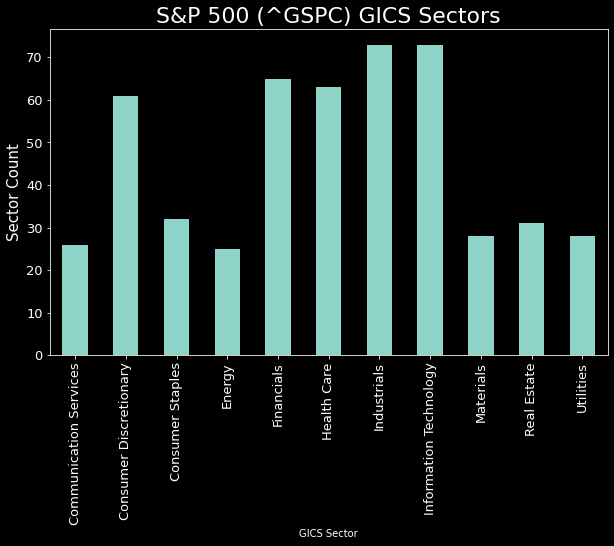

In [14]:
wiki_df_sectors = wiki_df.groupby(["GICS Sector"])["Symbol"].count()

ax = wiki_df_sectors.plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("S&P 500 (^GSPC) GICS Sectors", fontsize=22)
ax.set_ylabel("Sector Count", fontsize=15)
plt.show()


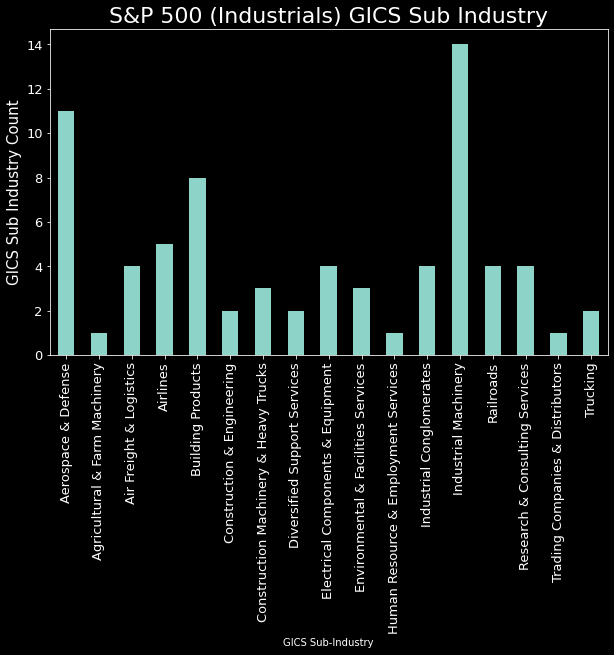

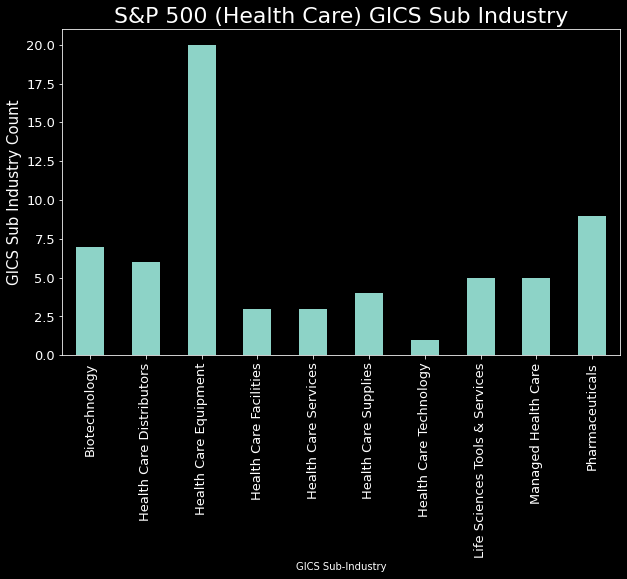

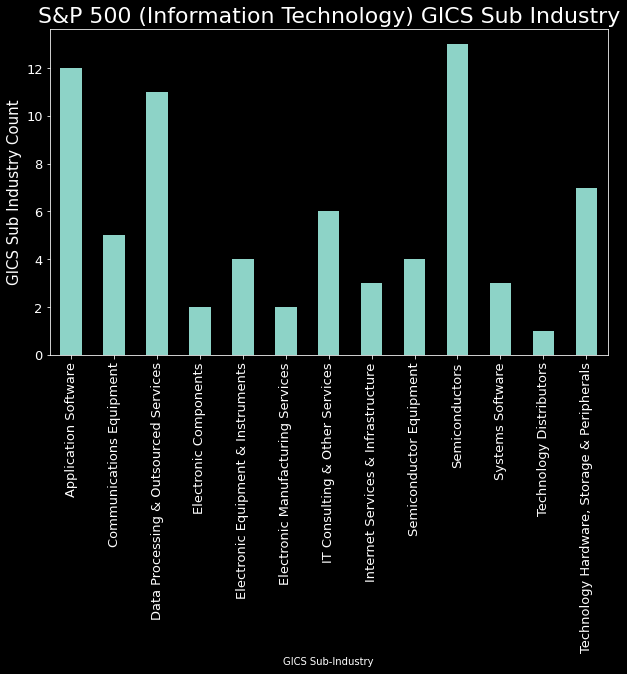

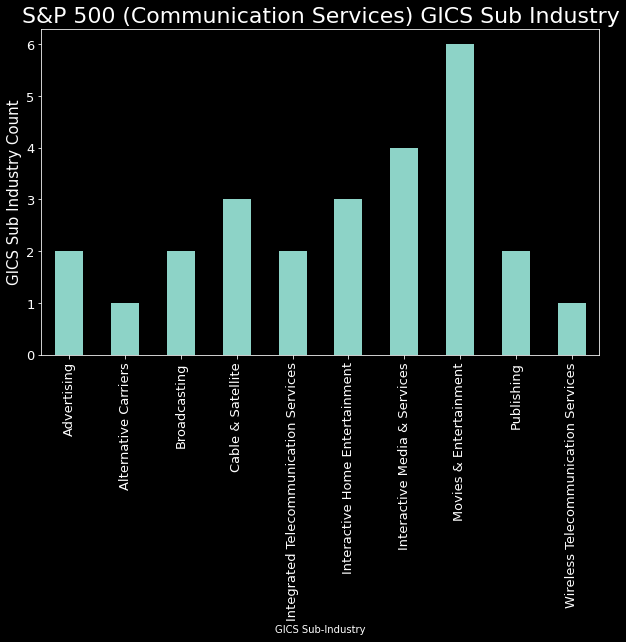

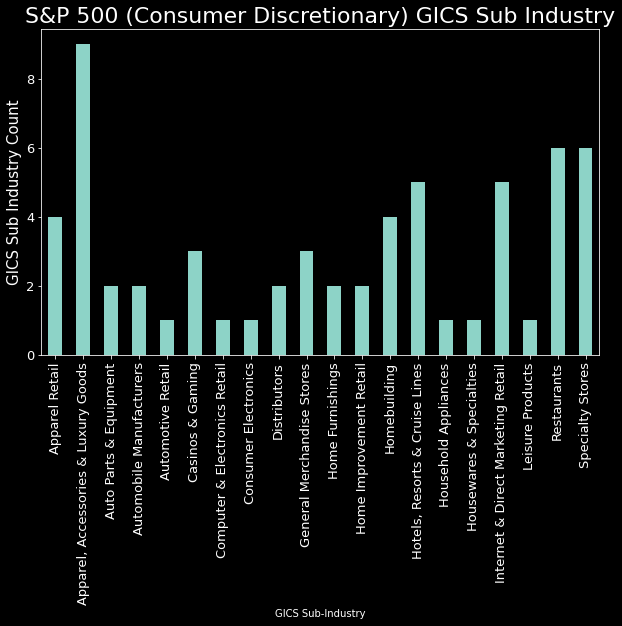

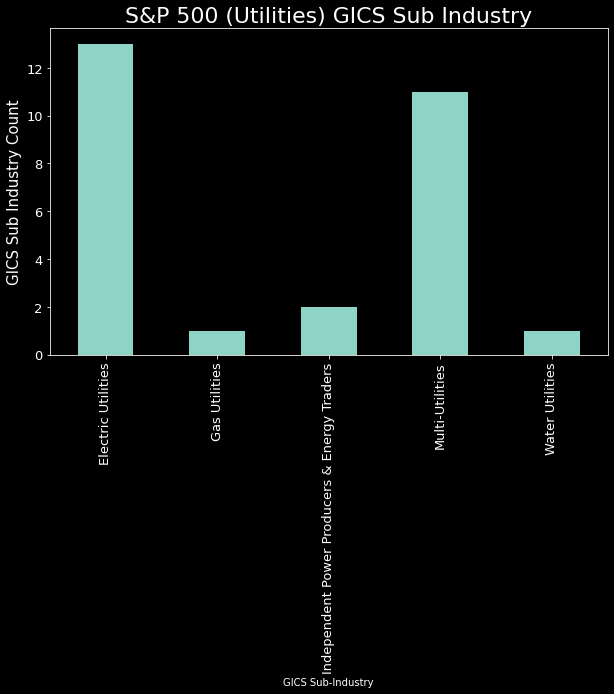

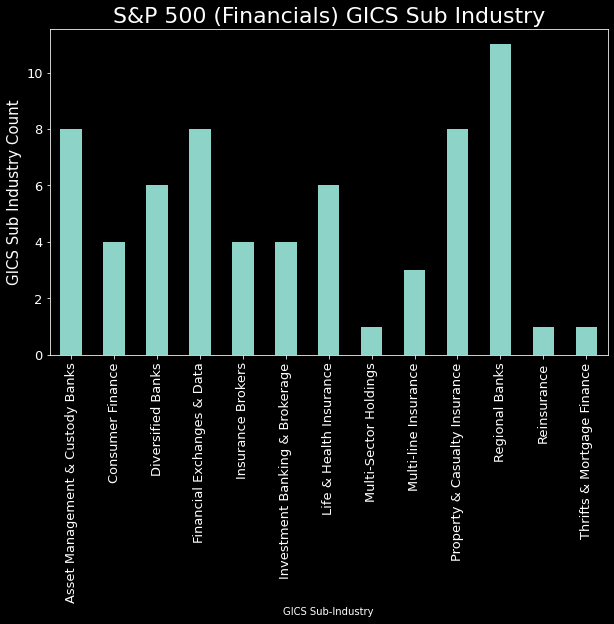

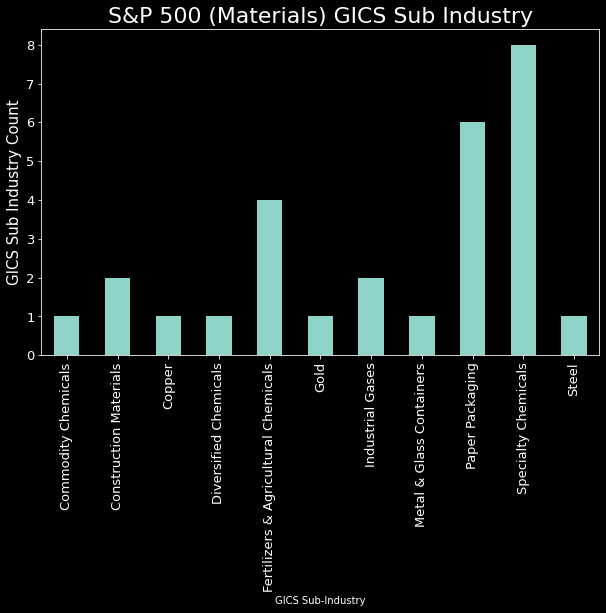

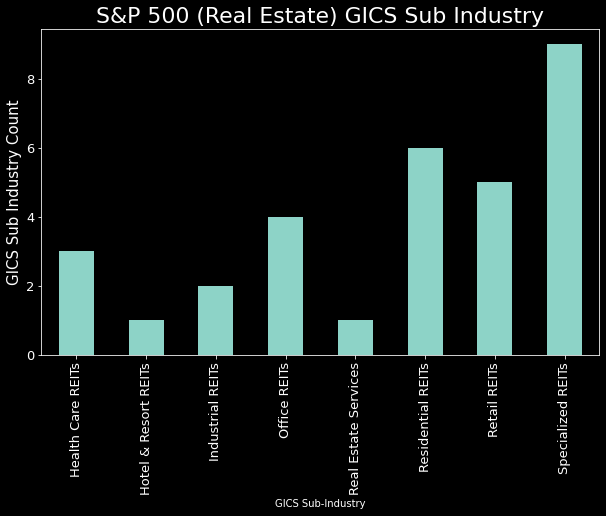

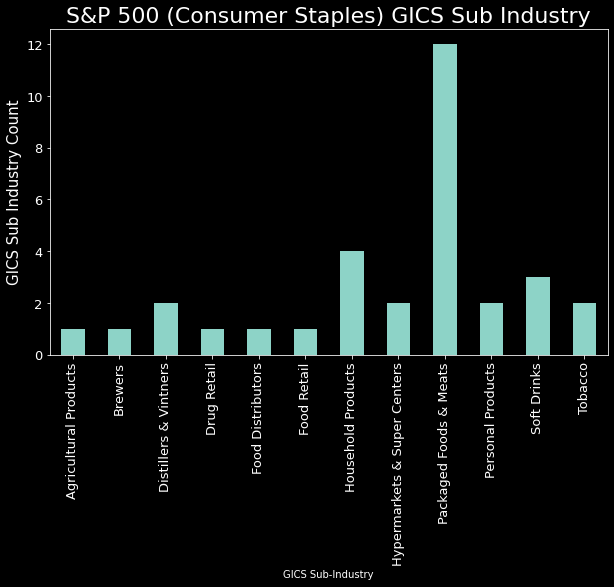

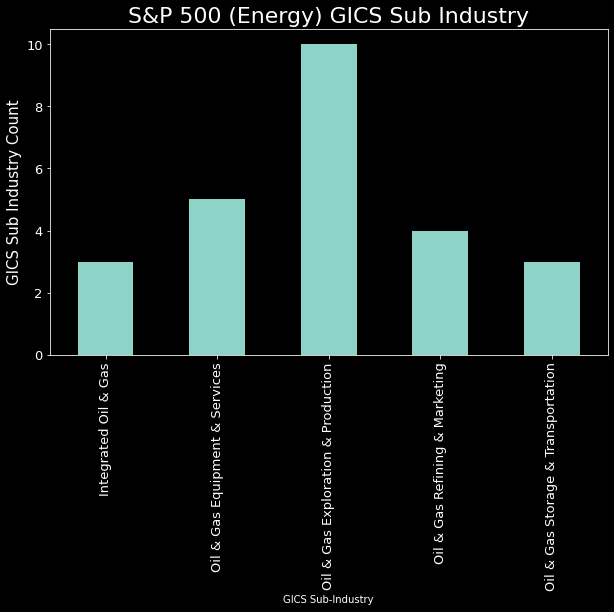

In [15]:
wiki_df_sectors_sub_ind = wiki_df.groupby(["GICS Sector", "GICS Sub-Industry"])["Symbol"].count()
sp500_sectors = wiki_df["GICS Sector"].unique()

for sector in sp500_sectors:
    sp500_sector = wiki_df[wiki_df["GICS Sector"] == sector]
    wiki_df_sub_sectors = sp500_sector.groupby(["GICS Sub-Industry"])["Symbol"].count()

    ax = wiki_df_sub_sectors.plot(kind='bar', figsize=(10,6), fontsize=13)
    ax.set_alpha(0.8)
    ax.set_title(f"S&P 500 ({sector}) GICS Sub Industry", fontsize=22)
    ax.set_ylabel("GICS Sub Industry Count", fontsize=15)
    plt.show()

In [16]:
wiki_df.groupby(["GICS Sector", "GICS Sub-Industry"])["Symbol"].count().tail(60)

GICS Sector             GICS Sub-Industry                           
Health Care             Health Care Services                             3
                        Health Care Supplies                             4
                        Health Care Technology                           1
                        Life Sciences Tools & Services                   5
                        Managed Health Care                              5
                        Pharmaceuticals                                  9
Industrials             Aerospace & Defense                             11
                        Agricultural & Farm Machinery                    1
                        Air Freight & Logistics                          4
                        Airlines                                         5
                        Building Products                                8
                        Construction & Engineering                       2
                        Constru

### Load the S&P 500 weights per tickers via  slick charts sp500 page - https://www.slickcharts.com/sp500

In [17]:
input_url = "https://www.slickcharts.com/sp500"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
res = requests.get(input_url, headers=headers)

soup = BeautifulSoup(res.content, 'lxml')
tables = soup.find_all('table') 

slick_df = pd.read_html(str(tables[0]))[0]
print(slick_df.head())

   #                Company Symbol    Weight    Price    Chg     % Chg
0  1             Apple Inc.   AAPL  6.558229   118.67  -0.02  (-0.02%)
1  2  Microsoft Corporation   MSFT  5.819005   222.20  -1.52  (-0.68%)
2  3        Amazon.com Inc.   AMZN  4.845765  3217.00 -94.37  (-2.85%)
3  4  Facebook Inc. Class A     FB  2.424619   284.08  -9.33  (-3.18%)
4  5  Alphabet Inc. Class A  GOOGL  1.817276  1790.79  31.06   (1.77%)


Save slick query dataframe in raw directory.

In [18]:
# slick_df.to_csv(project_dir + '/data/raw/'+ 'sp500_slick_df_raw.csv', index=False)

In [19]:
# slick_df = pd.read_csv(project_dir + '/data/raw/'+ 'sp500_slick_df_raw.csv')

In [20]:
print(slick_df.Weight.sum())
print(slick_df.shape)
print(slick_df)


99.991699
(505, 7)
       #                    Company Symbol    Weight    Price    Chg     % Chg
0      1                 Apple Inc.   AAPL  6.558229   118.67  -0.02  (-0.02%)
1      2      Microsoft Corporation   MSFT  5.819005   222.20  -1.52  (-0.68%)
2      3            Amazon.com Inc.   AMZN  4.845765  3217.00 -94.37  (-2.85%)
3      4      Facebook Inc. Class A     FB  2.424619   284.08  -9.33  (-3.18%)
4      5      Alphabet Inc. Class A  GOOGL  1.817276  1790.79  31.06   (1.77%)
..   ...                        ...    ...       ...      ...    ...       ...
500  501  Under Armour Inc. Class A    UAA  0.009228    15.67   0.86   (5.77%)
501  502  HollyFrontier Corporation    HFC  0.008948    22.83   5.26  (29.91%)
502  503  Under Armour Inc. Class C     UA  0.008662    13.81   0.78   (5.99%)
503  504             TechnipFMC Plc    FTI  0.008380     7.31   1.50  (25.73%)
504  505   News Corporation Class B    NWS  0.006416    16.09   0.95   (6.24%)

[505 rows x 7 columns]


In [21]:
# from src.data.get_data import SlickData
# sd = SlickData()
# sd.get_raw_data()
# sd.clean_data()
# slick_df = sd.df


### Get S&P 500 Index (^GSPC) as a Bench Mark from Yahoo Finance with yahooquery's Ticker

In [22]:
tickers = Ticker(['^GSPC'], asynchronous=True)
yf_data = tickers.history(start=start_date, end=end_date)

adj_close_df = yf_data.adjclose
adj_close_df.index.name = 'date'
adj_close_df = adj_close_df.reset_index(level='symbol')
adj_close_df = adj_close_df.pivot(columns='symbol')
adj_close_df.columns = [col[1] for col in adj_close_df.columns]
yahoo_sp500_index_adj_close_df = adj_close_df.copy()


In [23]:
# from src.data.get_data import YahooFinanceData
# yfd_sp500_index = YahooFinanceData(['^GSPC'], 'sp500_index', start, end)
# yfd_sp500_index.get_raw_data()
# yfd_sp500_index.clean_data()
# yahoo_sp500_index_adj_close_df = yfd_sp500_index.adj_close_df

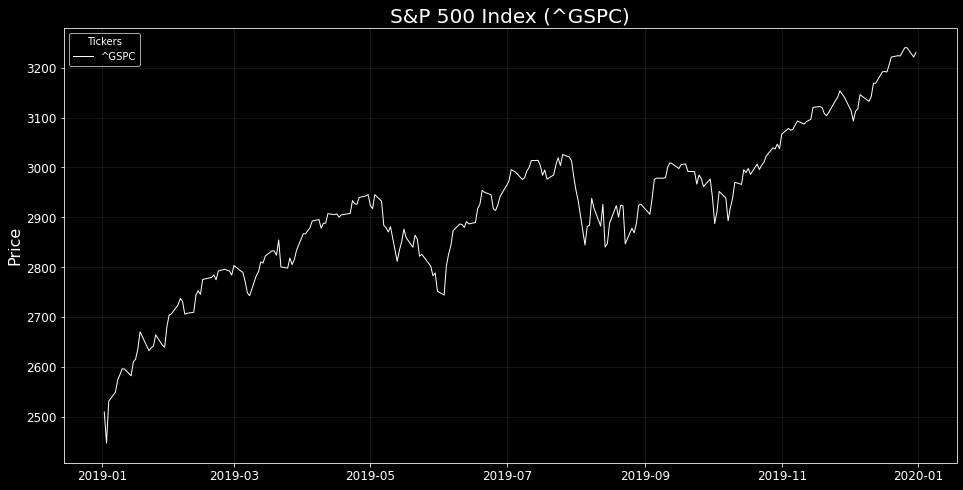

In [24]:
fig, ax1 = plt.subplots(1, figsize=(16, 8))
  
ax1.set_title(f"S&P 500 Index (^GSPC)", fontsize=s[1])
ax1.set_ylabel(f"Price", fontsize=s[2])
ax1.plot(yahoo_sp500_index_adj_close_df.index.values, yahoo_sp500_index_adj_close_df['^GSPC'], label='^GSPC', linewidth=w[1], color=c[0])
ax1.legend(loc='upper left', title = 'Tickers')
ax1.grid(alpha=ga)

plt.xticks(fontsize=s[3])
plt.yticks(fontsize=s[3])
plt.show()


### Use S&P Symbols to Get Adj Close from Yahoo Finance

In [25]:
sp500_tickers

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [26]:
tickers = Ticker(sp500_tickers, asynchronous=True)

In [27]:
yf_data = tickers.history(start=start_date, end=end_date)
print(yf_data)

{'MMM':                   high         low   volume        open       close  \
2019-01-02  190.990005  186.699997  2475200  187.820007  190.949997   
2019-01-03  188.279999  182.889999  3358200  188.279999  183.759995   
2019-01-04  191.979996  186.029999  2995100  186.750000  191.320007   
2019-01-07  192.300003  188.660004  2162200  191.360001  190.880005   
2019-01-08  194.110001  189.580002  2479800  193.000000  191.679993   
...                ...         ...      ...         ...         ...   
2019-12-24  178.669998  176.039993  1259500  178.270004  176.679993   
2019-12-26  176.660004  175.500000  1435200  176.449997  176.589996   
2019-12-27  177.539993  175.619995  1472900  176.649994  177.259995   
2019-12-30  178.960007  175.589996  1715100  177.259995  175.830002   
2019-12-31  176.589996  175.070007  1573500  175.229996  176.419998   

              adjclose  dividends  
2019-01-02  179.635086        NaN  
2019-01-03  172.871124        NaN  
2019-01-04  179.983185        N

In [28]:
good_tickers = []
error_tickers = {}
for k, v in yf_data.items():
    if isinstance(v, pd.DataFrame):
        adj_close_df = pd.DataFrame(v.adjclose)
        adj_close_df.rename(columns={'adjclose': k}, inplace=True)
        good_tickers.append(adj_close_df)
    else:
        error_tickers[k] = v
    
adj_close_df = pd.concat(good_tickers, axis=1)

yahoo_sp500_adj_close_df = adj_close_df.copy()
yahoo_sp500_adj_close_df.index.name = 'date'



In [29]:
yahoo_sp500_adj_close_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,179.635086,67.305016,78.864014,309.959991,136.644974,46.350380,224.570007,18.830000,156.437698,13.271391,...,100.250526,46.041862,18.711531,84.600266,64.819427,88.636864,156.240005,100.891823,39.315971,83.466866
2019-01-03,172.871124,64.128601,76.265549,302.290009,131.979675,44.704514,215.699997,17.049999,161.321426,13.262032,...,99.280663,45.860447,18.302540,81.414970,62.597370,86.407372,146.880005,99.066940,39.098495,80.581871
2019-01-04,179.983185,65.958916,78.722588,313.440002,137.111526,46.488358,226.190002,19.000000,157.319321,13.701917,...,103.284927,46.309223,19.008987,85.184715,65.238464,88.656235,152.970001,102.450378,40.299343,83.743507
2019-01-07,179.569214,66.946693,79.871574,314.799988,137.587784,47.799141,229.259995,20.570000,159.627472,13.767430,...,105.119019,46.108707,19.417980,87.434891,64.273651,88.559319,155.289993,102.489838,40.460091,84.247383
2019-01-08,180.321808,66.142906,80.242790,318.420013,141.067322,49.247898,232.679993,20.750000,158.518005,14.085645,...,108.412689,46.643410,20.059361,85.769180,64.877892,88.384834,156.330002,100.191460,40.828854,85.502151


In [30]:
yf_data_key_stats = tickers.key_stats
bad_ticker_stats = [k for k, v in yf_data_key_stats.items() if isinstance(v, str)]
[yf_data_key_stats.pop(key) for key in bad_ticker_stats]
sp500_yf_df = pd.DataFrame.from_dict(yf_data_key_stats).T
shares_outstanding_df = sp500_yf_df[['sharesOutstanding']]
shares_outstanding_df.index.name = 'symbol'
yahoo_sp500_shares_outstanding_df = shares_outstanding_df.copy()


In [31]:
yahoo_sp500_shares_outstanding_df.head()

,sharesOutstanding
symbol,
ABBV,1764829952
ATVI,772857024
MMM,576822016
AMD,1202710016
ADBE,479719008


## Data Cleaning
The S&P 500 data from yahoo finance adj close price is almost clean and ready for analysis use. we need to remove tickers that IPO or die mid year, dropping unusable Nan values between specified dates.

In [32]:
# for k, v in error_tickers.items():
#     print(k, '\t', v)
error_tickers_list = list(error_tickers.keys())
print(error_tickers_list)
len(error_tickers_list)

['CARR', 'LUMN', 'OTIS', 'VNT']


4

In [33]:

print(start_date, ' through ', end_date ,
      '\n------------------------------------------------------------------------------\n')
for k, v in error_tickers.items():
    print(k, '\t', v)


2019-01-01  through  2020-01-01 
------------------------------------------------------------------------------

CARR 	 Data doesn't exist for startDate = 1546329600, endDate = 1577865600
LUMN 	 {'meta': {'currency': 'USD', 'symbol': 'LUMN', 'exchangeName': 'NYQ', 'instrumentType': 'EQUITY', 'firstTradeDate': 322151400, 'regularMarketTime': 1604952255, 'gmtoffset': -18000, 'timezone': 'EST', 'exchangeTimezoneName': 'America/New_York', 'regularMarketPrice': 9.455, 'chartPreviousClose': 9.09, 'priceHint': 2, 'currentTradingPeriod': {'pre': {'timezone': 'EST', 'start': 1604912400, 'end': 1604932200, 'gmtoffset': -18000}, 'regular': {'timezone': 'EST', 'start': 1604932200, 'end': 1604955600, 'gmtoffset': -18000}, 'post': {'timezone': 'EST', 'start': 1604955600, 'end': 1604970000, 'gmtoffset': -18000}}, 'dataGranularity': '1d', 'range': '', 'validRanges': ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']}, 'indicators': {'quote': [{}], 'adjclose': [{}]}}
OTIS 	 Data d

#### Check for Nan values

In [34]:
tickers_with_nan_values = yahoo_sp500_adj_close_df.columns[yahoo_sp500_adj_close_df.isna().any()].tolist()
print(tickers_with_nan_values)


['CTVA', 'DOW', 'FOXA', 'FOX', 'VIAC']


#### Full list of usable tickers

In [35]:
[error_tickers_list.append(x) for x in tickers_with_nan_values]
print(error_tickers_list)
len(error_tickers_list)
yahoo_sp500_adj_close_df = yahoo_sp500_adj_close_df.drop(columns=tickers_with_nan_values)
yahoo_sp500_adj_close_df

['CARR', 'LUMN', 'OTIS', 'VNT', 'CTVA', 'DOW', 'FOXA', 'FOX', 'VIAC']


,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,179.635086,67.305016,78.864014,309.959991,136.644974,46.350380,224.570007,18.830000,156.437698,13.271391,...,100.250526,46.041862,18.711531,84.600266,64.819427,88.636864,156.240005,100.891823,39.315971,83.466866
2019-01-03,172.871124,64.128601,76.265549,302.290009,131.979675,44.704514,215.699997,17.049999,161.321426,13.262032,...,99.280663,45.860447,18.302540,81.414970,62.597370,86.407372,146.880005,99.066940,39.098495,80.581871
2019-01-04,179.983185,65.958916,78.722588,313.440002,137.111526,46.488358,226.190002,19.000000,157.319321,13.701917,...,103.284927,46.309223,19.008987,85.184715,65.238464,88.656235,152.970001,102.450378,40.299343,83.743507
2019-01-07,179.569214,66.946693,79.871574,314.799988,137.587784,47.799141,229.259995,20.570000,159.627472,13.767430,...,105.119019,46.108707,19.417980,87.434891,64.273651,88.559319,155.289993,102.489838,40.460091,84.247383
2019-01-08,180.321808,66.142906,80.242790,318.420013,141.067322,49.247898,232.679993,20.750000,158.518005,14.085645,...,108.412689,46.643410,20.059361,85.769180,64.877892,88.384834,156.330002,100.191460,40.828854,85.502151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,171.810944,85.925331,85.136879,172.300003,208.266663,58.425743,329.640015,46.540001,159.305710,19.103735,...,138.279648,61.655396,35.554531,97.278679,77.613426,98.878494,254.330002,149.679855,50.083553,132.162842
2019-12-26,171.723434,85.925331,85.117928,171.009995,208.699707,58.505219,331.200012,46.630001,158.015945,19.268091,...,139.767166,61.586739,35.659187,97.466339,77.573936,100.317375,254.419998,149.351959,50.209904,132.272202
2019-12-27,172.374985,86.043480,84.520973,169.270004,208.867004,58.803261,330.790009,46.180000,157.103195,19.316429,...,138.646561,61.910412,35.497444,97.209534,77.810806,100.425781,256.000000,149.063782,50.054398,132.490967


#### Full list of usable tickers

In [36]:
wiki_df = wiki_df[~wiki_df.Symbol.isin(error_tickers_list)]
print(wiki_df.Symbol)
print(len(wiki_df))
wiki_df = wiki_df.reset_index()



0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 496, dtype: object
496


#### Visualize the adj close data

In [37]:
sp500_sort_by_amax_columns = yahoo_sp500_adj_close_df.iloc[:,:].agg([np.min, np.max]).T.sort_values(['amax']).T.columns
yahoo_sp500_adj_close_df = yahoo_sp500_adj_close_df[sp500_sort_by_amax_columns]
yahoo_sp500_adj_close_df.head()


,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,SHW,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,7.157524,8.515582,7.677559,10.135902,11.040720,11.260846,11.111471,10.589853,13.292211,12.624404,...,385.904297,466.029999,443.359985,546.039978,838.479980,1045.849976,1054.680054,1539.130005,1721.699951,2420.820068
2019-01-03,7.048802,8.515582,7.687096,9.852178,10.934093,11.115358,11.019942,10.388566,13.210776,12.361787,...,374.255188,450.239990,439.450012,513.559998,845.580017,1016.059998,1025.469971,1500.280029,1663.119995,2381.939941
2019-01-04,7.320606,8.515582,7.849231,10.585953,11.409068,11.600322,11.331138,10.824686,13.617958,12.943297,...,384.172607,471.679993,455.000000,527.150024,835.630005,1070.709961,1078.069946,1575.390015,1717.550049,2412.830078
2019-01-07,7.510870,8.698713,8.335636,10.762061,11.612627,11.833104,11.376903,10.807912,13.663198,13.196535,...,389.593781,478.440002,485.149994,533.580017,822.320007,1068.390015,1075.920044,1629.510010,1711.819946,2471.010010
2019-01-08,7.583352,8.643772,8.163962,10.957734,11.787107,11.949494,11.486736,10.947694,13.708441,12.943297,...,392.358490,482.989990,497.369995,556.530029,811.369995,1076.280029,1085.369995,1656.579956,1686.920044,2494.959961


In [39]:
sp500_df = yahoo_sp500_adj_close_df.copy()

def _plot_adj_close(ax, df, df_cols, ticker, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
    ax.plot(df.index.values, df.iloc[:,:100], linewidth=w[0], color=c[0], alpha=0.15)
    ax.plot(df.index.values, df[ticker], label=ticker, linewidth=w[3], color=c[2])
    
    ax.legend(loc='upper left', title = 'Tickers')
    ax.grid(alpha=ga)


def plot_adj_close(ticker1, ticker2, ticker3, ticker4, ticker5):
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(20, 24))
    
    _plot_adj_close(ax1, sp500_df, sp500_df.loc[:,ticker1], ticker1,
                   f"S&P 500 Stocks ({ticker1})",
                   f"Price")
    _plot_adj_close(ax2, sp500_df, sp500_df.loc[:,ticker2], ticker2,
                   f"S&P 500 Stocks ({ticker2})",
                   f"Price")
    _plot_adj_close(ax3, sp500_df, sp500_df.loc[:,ticker3], ticker3,
                   f"S&P 500 Stocks ({ticker3})",
                   f"Price")
    _plot_adj_close(ax4, sp500_df, sp500_df.loc[:,ticker4], ticker4,
                   f"S&P 500 Stocks ({ticker4})",
                   f"Price")
    _plot_adj_close(ax5, sp500_df, sp500_df.loc[:,ticker5], ticker5,
                   f"S&P 500 Stocks ({ticker5})",
                   f"Price")
    
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()
    return 

widgets.interact(plot_adj_close, 
         ticker1=sp500_df.iloc[:,:100], 
         ticker2=sp500_df.iloc[:,100:200], 
         ticker3=sp500_df.iloc[:,200:300], 
         ticker4=sp500_df.iloc[:,300:400], 
         ticker5=sp500_df.iloc[:,400:]
        );



interactive(children=(Dropdown(description='ticker1', options=('F', 'AMCR', 'GE', 'FCX', 'NWSA', 'NWS', 'HBAN'…

In [40]:
ALL = 'SELECT ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [41]:
tickers = None

In [42]:

def _plot_tickers(ax, df, background_tickers, focus_tickers, legend=True, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
 
    for i in range(len(focus_tickers)):
        ax.plot(df.index.values, df[focus_tickers[i]], label=focus_tickers[i], linewidth=w[3], color=c[2])
    
    if background_tickers is not None:  
        for i in focus_tickers:
            background_tickers.remove(i)
            
#         if 10 >= len(background_tickers) > 1:
        if len(background_tickers) <= 10 and len(background_tickers) > 1:
            for i in range(len(background_tickers)):
                ax.plot(df.index.values, df[background_tickers[i]], label=background_tickers[i],  linewidth=w[3], color=c[0], alpha=0.75)
        else:
            ax.plot(df.index.values, df[background_tickers], linewidth=w[3], color=c[0], alpha=0.75)
    
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Tickers', ncol=2)
    ax.grid(alpha=ga)


def plot_ticker_list(sector, sub_sector, ticker):

    background_tickers = None
    legend = True   
    if sector == 'SELECT ALL':
        legend = False
    else:
        if ticker != 'SELECT ALL' :
            if sub_sector == 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == sector]['Symbol'])
                background_tickers.remove('SELECT ALL')   
            elif sub_sector != 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == sub_sector]['Symbol'])
                background_tickers.remove('SELECT ALL')              
              
    fig, (ax1) = plt.subplots(1, figsize=(20, 10))
    
    _plot_tickers(ax1, sp500_df, background_tickers, tickers, legend=legend, 
                  title=f"S&P 500 Stocks\nSector: {sector} \n Sub Industry: {sub_sector} \n Tickers: {ticker}",
                    ylabel=f"Price")
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()

    
    
def select_ticker_list(ticker):

    global tickers
    
    if ticker != 'SELECT ALL':        
        tickers = [dropdown_ticker.value]
    else:
        if dropdown_sector.value != 'SELECT ALL':
            if dropdown_sub_sector.value == 'SELECT ALL':
                tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
            elif dropdown_sub_sector.value != 'SELECT ALLf':
                tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
        else:
            tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
            tickers.remove('SELECT ALL')
    return tickers


def get_ticker(sub_sector):
    global tickers

    if sub_sector != 'SELECT ALL':
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
    else:
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    tickers.remove('SELECT ALL')


def get_sub_sector(sector):   
    global tickers

    dropdown_sub_sector.options = unique_sorted_values_plus_ALL(
        wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']
    )
    get_ticker(dropdown_sub_sector.value)
    if  dropdown_sector.value != 'SELECT ALL':
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    else:
        tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
    tickers.remove('SELECT ALL')


dropdown_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df['GICS Sector']),
        description='GICS Sector:'
)

dropdown_sub_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']),
    description='Sub Sector:'
)

dropdown_ticker = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']),
    description='Ticker:'
)

btn_plot = widgets.Button(description='Plot')


i = widgets.interactive(get_sub_sector, sector=dropdown_sector)
j = widgets.interactive(get_ticker, sub_sector=dropdown_sub_sector)
k = widgets.interactive(select_ticker_list, ticker=dropdown_ticker)

output_ticker = widgets.Output()

def btn_plot_event_handler(obj):
    output_ticker.clear_output()
    with output_ticker:
        plot_ticker_list(dropdown_sector.value, dropdown_sub_sector.value, dropdown_ticker.value)


display(i)
display(j)
display(k)

display(btn_plot)

btn_plot.on_click(btn_plot_event_handler)

tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
tickers.remove('SELECT ALL')



interactive(children=(Dropdown(description='GICS Sector:', options=('SELECT ALL', 'Communication Services', 'C…

interactive(children=(Dropdown(description='Sub Sector:', options=('SELECT ALL',), value='SELECT ALL'), Output…

interactive(children=(Dropdown(description='Ticker:', options=('SELECT ALL',), value='SELECT ALL'), Output()),…

Button(description='Plot', style=ButtonStyle())

In [43]:
display(output_ticker)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1440x720 with 1 Axes>', '…

## Data Definition

Descriptions of columns values available on yahoo finance, might be used later but for now only Adj. Close will be used.

| # | Column | Description |
| --- | --- | --- |
| 0  | Open        | The price at which a stock trades when an exchange opening of the regular trading day. |
| 1  | High        | The highest price at which a stock traded during the course of the regular trading day. |
| 2  | Low         | The lowest price at which a stock traded during the course of the  regular trading day. |
| 3  | Close       | The last price at which the stock traded during the regular trading day. |
| 4  | Volume      | The number of shares of a stock traded during a given period of time. |
| 5  | Ex-Dividend | The ex-dividend date of a stock is the day on which the stock begins trading without the subsequent dividend value.
 |
| 6  | Split Ratio | A corporate action in which a company divides its existing shares into multiple shares to boost the liquidity of the shares. |
| 7  | Adj. Open   | A stock's opening price to reflect that stock's value after accounting for any corporate actions. |
| 8  | Adj. High   | A stock's high price during the course of the  regular trading day that reflect that stock's value after accounting for any corporate actions. |
| 9  | Adj. Low    | A stock's low price during the course of the  regular trading day that reflect that stock's value after accounting for any corporate actions. |
| 10 | Adj. Close  | A stock's closing price to reflect that stock's value after accounting for any corporate actions. |
| 11 | Adj. Volume | The number of shares of a stock traded during a given period of time after accounting for any corporate actions. |

In [43]:
yahoo_sp500_adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-01-02 to 2019-12-31
Columns: 495 entries, F to NVR
dtypes: float64(495)
memory usage: 986.5+ KB


In [44]:
yahoo_sp500_index_adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9+ KB


In [45]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  495 non-null    int64 
 1   Symbol                 495 non-null    object
 2   Security               495 non-null    object
 3   SEC filings            495 non-null    object
 4   GICS Sector            495 non-null    object
 5   GICS Sub-Industry      495 non-null    object
 6   Headquarters Location  495 non-null    object
 7   Date first added       441 non-null    object
 8   CIK                    495 non-null    int64 
 9   Founded                488 non-null    object
dtypes: int64(2), object(8)
memory usage: 38.8+ KB


Now lets look at price range. We can see how high and low a stock might be with the given start/end date window within the S&P 500.

In [46]:
sp500_df.iloc[:,:].agg([np.min, np.max]).T.sort_values(['amax'])

,amin,amax
F,7.048802,10.017866
AMCR,8.515582,11.037725
GE,7.677559,11.521687
FCX,8.431238,14.005204
NWSA,10.934093,14.312410
...,...,...
GOOG,1016.059998,1361.170044
GOOGL,1025.469971,1362.469971
AMZN,1500.280029,2020.989990
BKNG,1649.489990,2077.439941


In [47]:
sp500_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F,252.0,8.810677,0.667356,7.048802,8.317232,8.859331,9.284705,10.017866
AMCR,252.0,9.837583,0.685136,8.515582,9.260234,9.797499,10.390612,11.037725
GE,252.0,9.720268,0.926838,7.677559,9.021839,9.825083,10.309121,11.521687
FCX,252.0,11.103312,1.299217,8.431238,10.092565,11.122009,12.098318,14.005204
NWSA,252.0,12.699755,0.784165,10.934093,12.166361,12.684435,13.336110,14.312410
...,...,...,...,...,...,...,...,...
GOOG,252.0,1188.393057,81.765383,1016.059998,1121.527466,1185.010010,1240.017548,1361.170044
GOOGL,252.0,1191.216942,79.791406,1025.469971,1126.540039,1189.490051,1241.562469,1362.469971
AMZN,252.0,1789.189206,101.313650,1500.280029,1735.845032,1786.450012,1855.319946,2020.989990
BKNG,252.0,1871.153892,106.156030,1649.489990,1786.140015,1877.295044,1943.224945,2077.439941


In [48]:
sp500_df.index.name = 'Date'
sp500_df

,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,SHW,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,7.157524,8.515582,7.677559,10.135902,11.040720,11.260846,11.111471,10.589853,13.518568,12.624404,...,385.904297,466.029999,443.359985,546.039978,838.479980,1045.849976,1054.680054,1539.130005,1721.699951,2420.820068
2019-01-03,7.048802,8.515582,7.687096,9.852178,10.934093,11.115358,11.019942,10.388566,13.435747,12.361787,...,374.255188,450.239990,439.450012,513.559998,845.580017,1016.059998,1025.469971,1500.280029,1663.119995,2381.939941
2019-01-04,7.320606,8.515582,7.849231,10.585953,11.409068,11.600322,11.331138,10.824686,13.849862,12.943297,...,384.172607,471.679993,455.000000,527.150024,835.630005,1070.709961,1078.069946,1575.390015,1717.550049,2412.830078
2019-01-07,7.510870,8.698713,8.335636,10.762061,11.612627,11.833104,11.376903,10.807912,13.895874,13.196535,...,389.593781,478.440002,485.149994,533.580017,822.320007,1068.390015,1075.920044,1629.510010,1711.819946,2471.010010
2019-01-08,7.583352,8.643772,8.163962,10.957734,11.787107,11.949494,11.486736,10.947694,13.941887,12.943297,...,392.358490,482.989990,497.369995,556.530029,811.369995,1076.280029,1085.369995,1656.579956,1686.920044,2494.959961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,9.311640,10.432781,11.143744,12.941996,13.751718,14.060658,14.439969,14.582891,16.179209,15.390432,...,577.117004,598.809998,828.890015,790.469971,1219.310059,1343.560059,1344.430054,1789.209961,2044.000000,3817.149902
2019-12-26,9.291973,10.490795,11.183578,13.121330,13.938616,14.296807,14.468564,14.452280,16.179209,15.429102,...,577.573730,598.039978,838.599976,791.979980,1210.719971,1360.400024,1362.469971,1868.770020,2064.320068,3810.550049
2019-12-27,9.203478,10.587483,11.133786,12.981848,13.918942,14.237770,14.411376,14.537462,16.073650,15.371098,...,577.663147,597.880005,836.789978,792.830017,1202.589966,1351.890015,1354.640015,1869.800049,2072.540039,3816.370117


## Export SP500 data to a new csv file
In order to bring the changes you made here into the next notebook, write out the updated data frame to a new csv file.

Export the processed dataframe as a csv file to the data folder created earlier. Name this new csv file `data_wrangle_sp500_df_output.csv`.


In [49]:
yahoo_sp500_adj_close_df.to_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_adj_close_interim.csv', index=True)
yahoo_sp500_shares_outstanding_df.to_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_shares_outstanding_interim.csv', index=True)
yahoo_sp500_index_adj_close_df.to_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_index_adj_close_interim.csv', index=True)
wiki_df.to_csv(project_dir + '/data/interim/'+ 'wiki_sp500_interim.csv', index=False)
slick_df.to_csv(project_dir + '/data/interim/'+ 'slick_sp500_interim.csv', index=False)

